In [1]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
(X, y), (X_test, y_test) = mnist.load_data()

In [3]:
y=to_categorical(y)
y_train=y
y_test=to_categorical(y_test)

In [4]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [5]:
X_train = X.reshape((60000, 28*28))
X_train = X_train/255

In [6]:
X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [7]:
net.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: 0.4051 - acc: 0.8722
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1800 - acc: 0.9464
Epoch 3/10
469/469 [==============================] - 14s 29ms/step - loss: 0.1443 - acc: 0.9584
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1220 - acc: 0.9638
Epoch 5/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1124 - acc: 0.9668
Epoch 6/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1009 - acc: 0.9702
Epoch 7/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0939 - acc: 0.9718
Epoch 8/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0874 - acc: 0.9741 0s - loss: 0.0872 - 
Epoch 9/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0819 - acc: 0.9750
Epoch 10/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0821 - acc: 0.9752 2s - los

In [8]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0628 - acc: 0.9811


In [9]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

In [10]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
val = net.fit(partial_X_train,partial_y_train, epochs=20, batch_size=128,validation_data=(X_val, y_val),verbose=0)

In [12]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

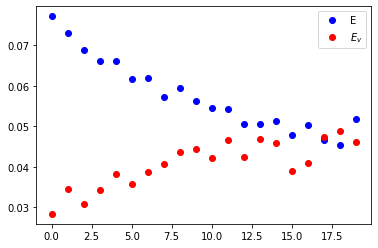

In [13]:
x = np.arange(0, len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

In [14]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5

## 더 좋은 분석을 위해 layer 층을 많이 쌓았고 over-fitting을 피하기 위해 Dropout을 해주었다. 그 결과 Train_ACC는 0.9752, Test_ACC는 0.9811이 나왔다. 잘 분류 됨을 확인 할 수 있었다.

In [ ]:
그래프 결과가 좀 이상하게 나오는데.. 아마 중복 피팅했기 때문으로 추정됨. 코드 자체는 문제가 없으므로 감점하진 않겠지만 신경 쓰세요.